In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [3]:
drinks_url = 'https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv'

df = pd.read_csv(drinks_url)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [10]:
# list country names for which we did not have continent
df[df['continent'].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [13]:
# TASK: replace all NaN in 'continent' with 'Other'
df['continent'].fillna('Other', inplace=True)

In [20]:
# find max beer per continent
# df[df['beer_servings']==df['beer_servings'].max()]

df.groupby('continent')['beer_servings'].idxmax()

continent
AF       117
AS       141
EU        45
OC       129
Other    130
SA       188
Name: beer_servings, dtype: int64

<Axes: xlabel='continent', ylabel='counts'>

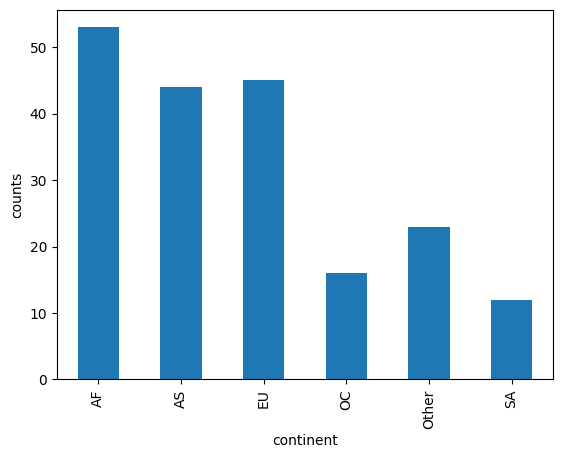

In [24]:
#number of countries in each continent

df.groupby('continent').size().plot(kind='bar', xlabel='continent', ylabel='counts')

In [25]:
# Plot histogram of wine_servings and beer_servings

wine_and_beer = df.loc[:,['wine_servings','beer_servings']]
wine_and_beer


,wine_servings,beer_servings
0,0,0
1,54,89
2,14,25
3,312,245
4,45,217
...,...,...
188,3,333
189,1,111
190,0,6
191,4,32


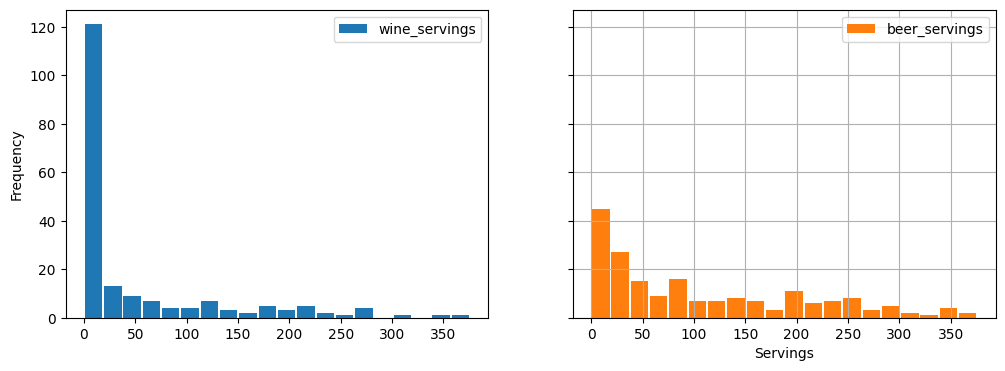

In [36]:
wine_and_beer.plot.hist(bins=20,rwidth=0.9,subplots=True, layout=(1,2), sharey=True, figsize=(12,4))
plt.xlabel('Servings')
plt.grid()


Text(0, 0.5, 'Liters')

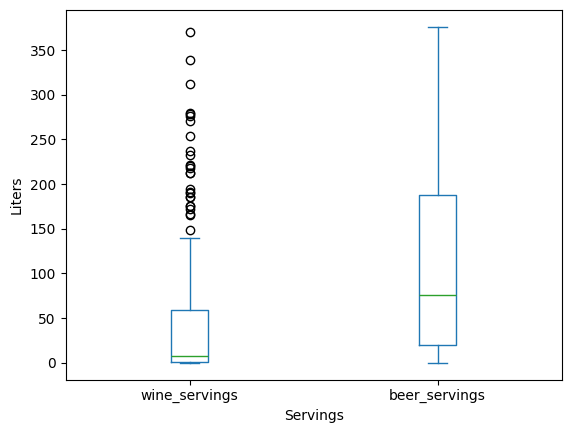

In [38]:
df.plot.box(column= ['wine_servings', 'beer_servings'])
plt.xlabel('Servings')
plt.ylabel('Liters')

<Axes: xlabel='beer_servings', ylabel='wine_servings'>

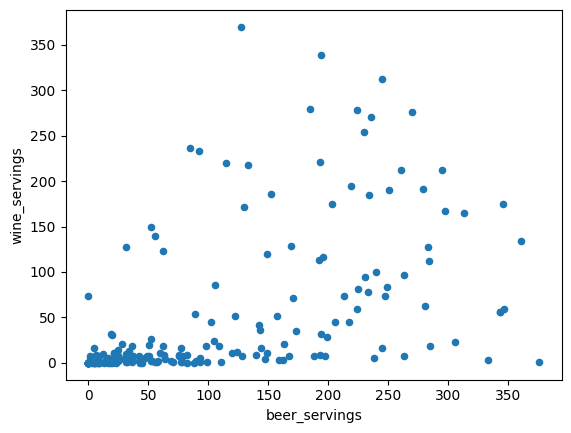

In [39]:
# scatterplot of beer servings versus wine servings
df.plot.scatter(x='beer_servings', y='wine_servings')

In [40]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
